In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/arnav/WorkSpace/GitHub/Bangladesh-Rainfall/historical-rainfall-data-in-bangladesh/customized_daily_rainfall_data.csv")
df.head(10)

,StationIndex,Station,Year,Month,Day,Rainfall
0,1,Dhaka,1970,1,1,0
1,1,Dhaka,1970,1,2,0
2,1,Dhaka,1970,1,3,0
3,1,Dhaka,1970,1,4,0
4,1,Dhaka,1970,1,5,0
5,1,Dhaka,1970,1,6,0
6,1,Dhaka,1970,1,7,0
7,1,Dhaka,1970,1,8,0
8,1,Dhaka,1970,1,9,0
9,1,Dhaka,1970,1,10,0


In [3]:
df.drop(df[(df['Day']>28) & (df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Day']>29) & (df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[(df['Day']>30) & ((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [4]:
date = [str(y)+'-'+str(m)+'-'+str(d) for y, m, d in zip(df.Year, df.Month, df.Day)]

In [5]:
df.index = pd.to_datetime(date)

In [6]:
df['date'] = df.index
df['dayofyear']=df['date'].dt.dayofyear
df.drop('date',axis=1,inplace=True)

In [7]:
df.head()

,StationIndex,Station,Year,Month,Day,Rainfall,dayofyear
1970-01-01,1,Dhaka,1970,1,1,0,1
1970-01-02,1,Dhaka,1970,1,2,0,2
1970-01-03,1,Dhaka,1970,1,3,0,3
1970-01-04,1,Dhaka,1970,1,4,0,4
1970-01-05,1,Dhaka,1970,1,5,0,5


In [8]:
df.size

3727801

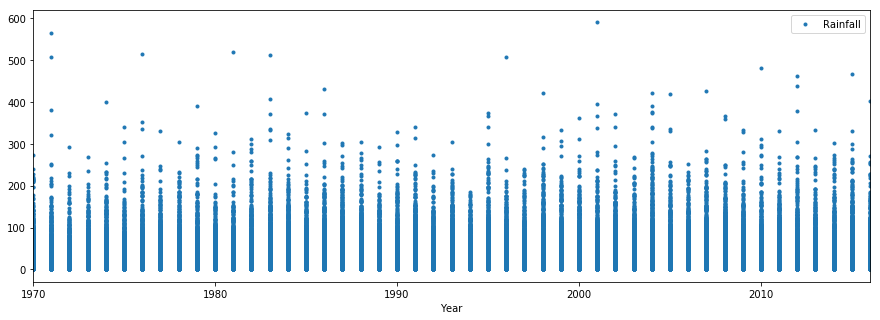

In [9]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

In [10]:
train = df.loc[df['Year'] <= 1975]
test = df.loc[df['Year'] == 1976]
train=train[train['Station']=='Dhaka']
test=test[test['Station']=='Dhaka']

In [11]:
train.size

12782

In [12]:
X_train=train.drop(['Station','StationIndex','dayofyear'],axis=1)
Y_train=train['Rainfall']

In [13]:
X_test=test.drop(['Station','StationIndex','dayofyear'],axis=1)
Y_test=test['Rainfall']

In [14]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC(gamma='auto',kernel='linear')
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
Y_pred = model.predict(X_test)

In [18]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']!=0].head(10)

,Actual Rainfall,Predicted Rainfall
1976-02-02,1,1
1976-02-05,2,2
1976-02-06,3,3
1976-02-07,1,1
1976-03-04,7,7
1976-03-08,34,34
1976-03-22,62,60
1976-03-23,13,13
1976-03-27,1,1
1976-04-04,1,1


In [19]:
Y_test1=test['Rainfall']

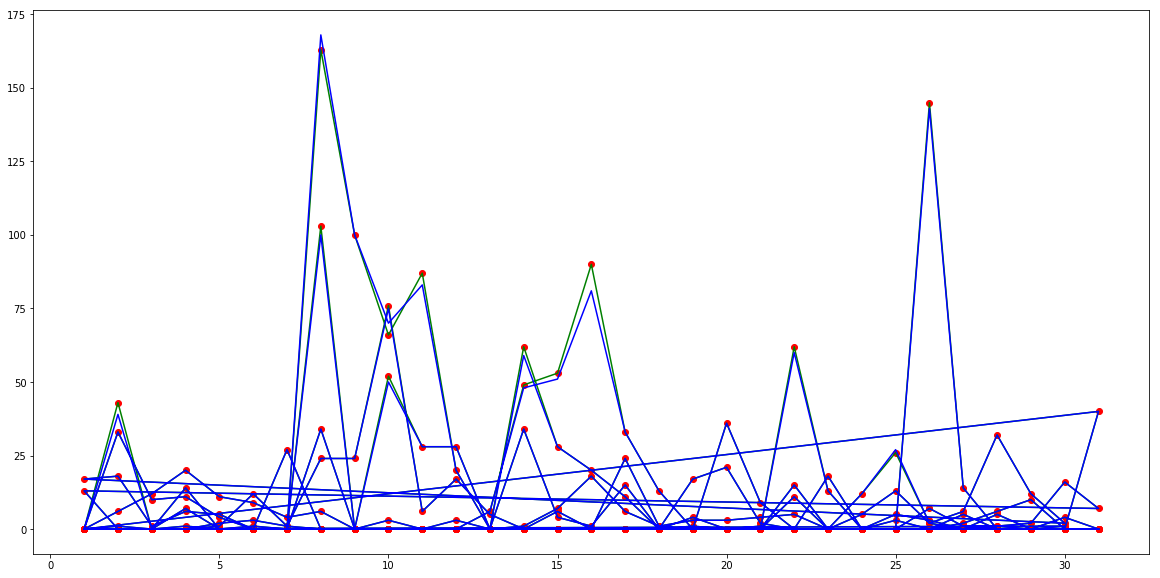

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

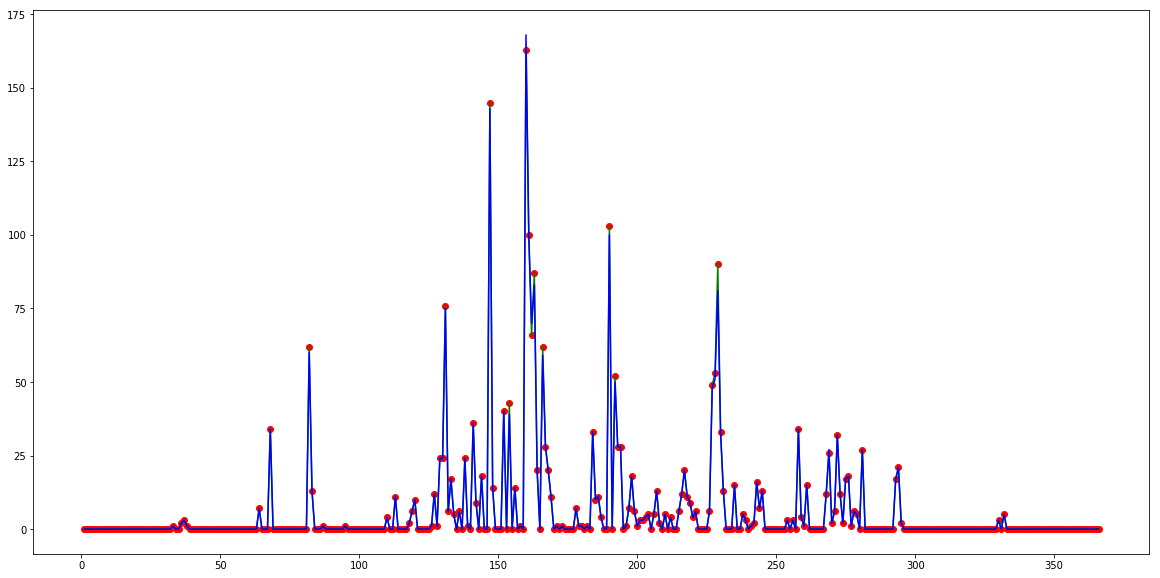

In [18]:
plt.figure(figsize=(20,10))


plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

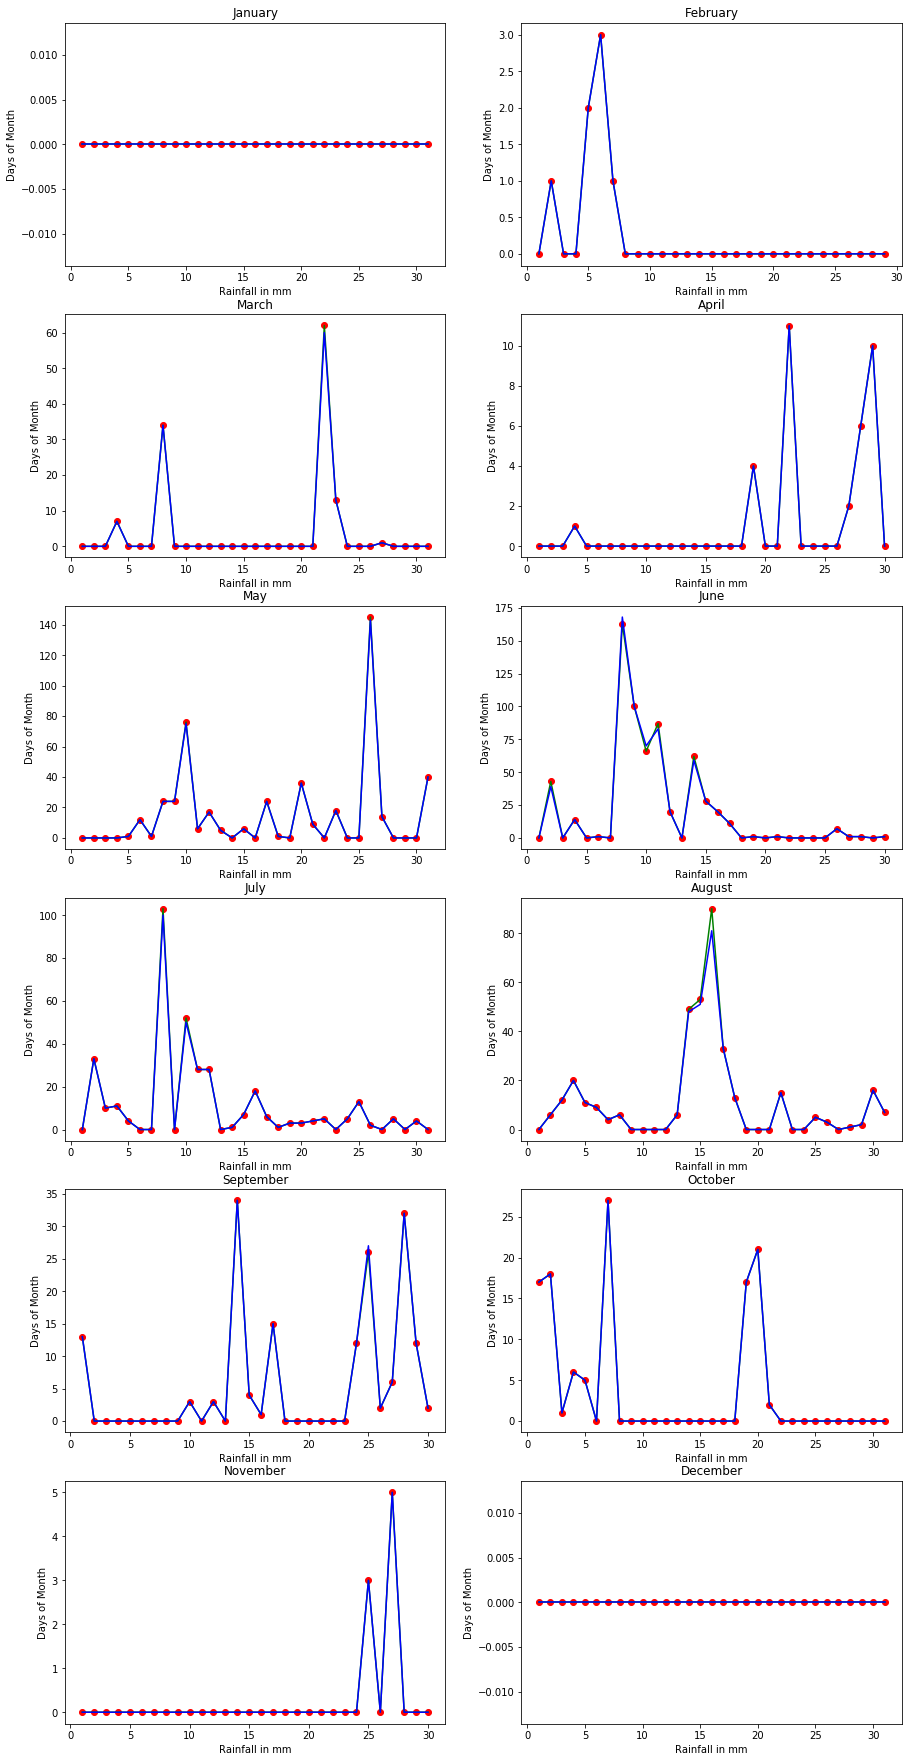

In [19]:
import datetime
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],model.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1

In [20]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [21]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
1976-02-02,1,1.099172
1976-02-05,2,2.098371
1976-02-06,3,3.097573
1976-02-07,1,1.099165
1976-03-04,7,7.094390
1976-03-08,34,34.072870
1976-03-22,62,62.050538
1976-03-23,13,13.089582
1976-03-27,1,1.099138
1976-04-04,1,1.099174


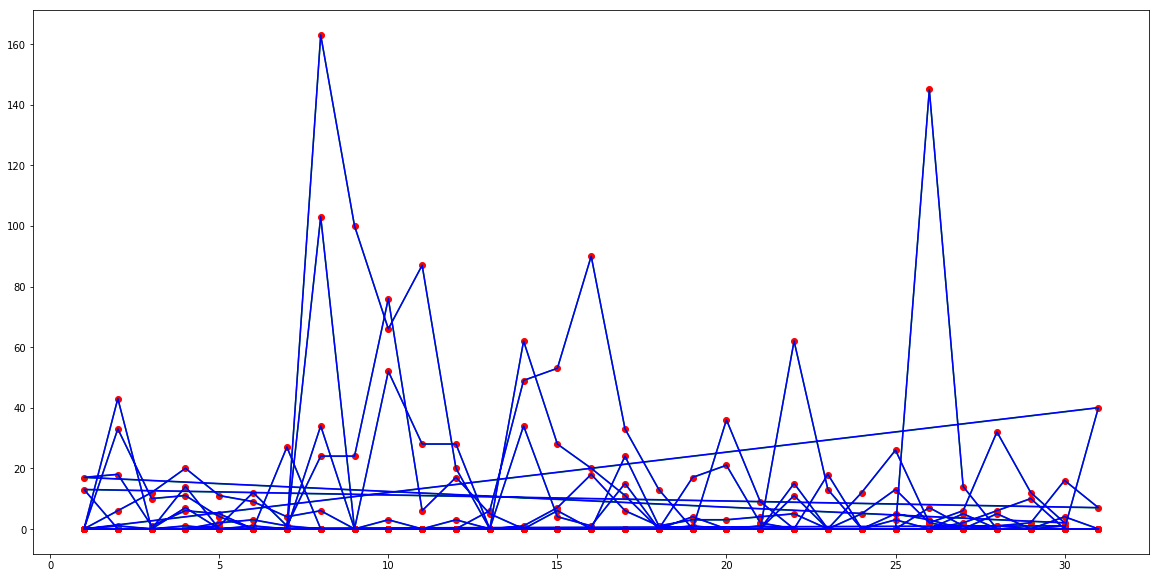

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

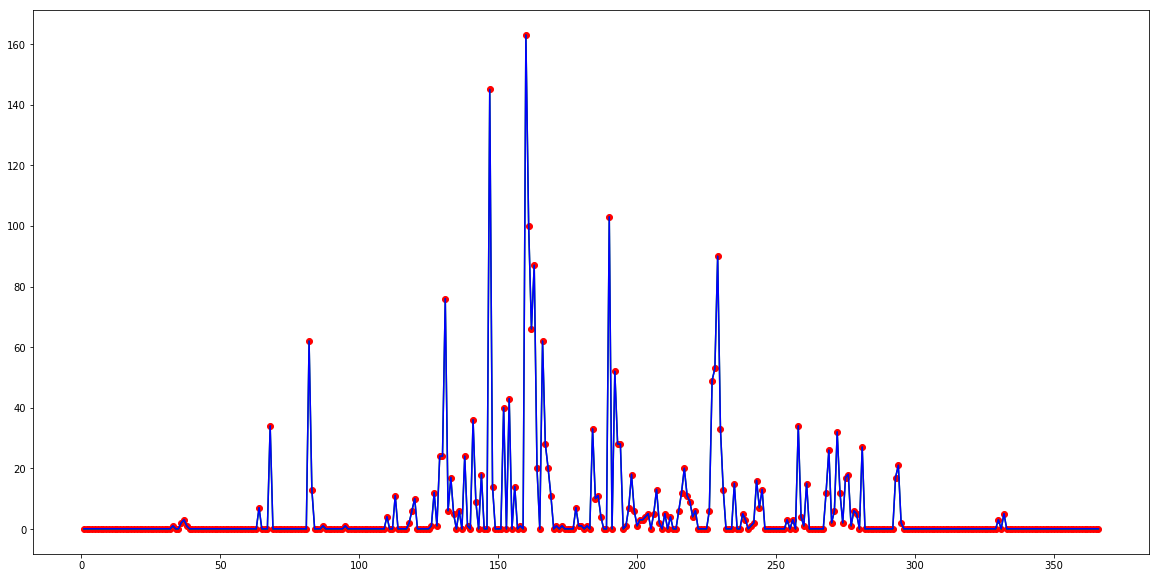

In [23]:
plt.figure(figsize=(20,10))
Y_test1=test['Rainfall']

plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

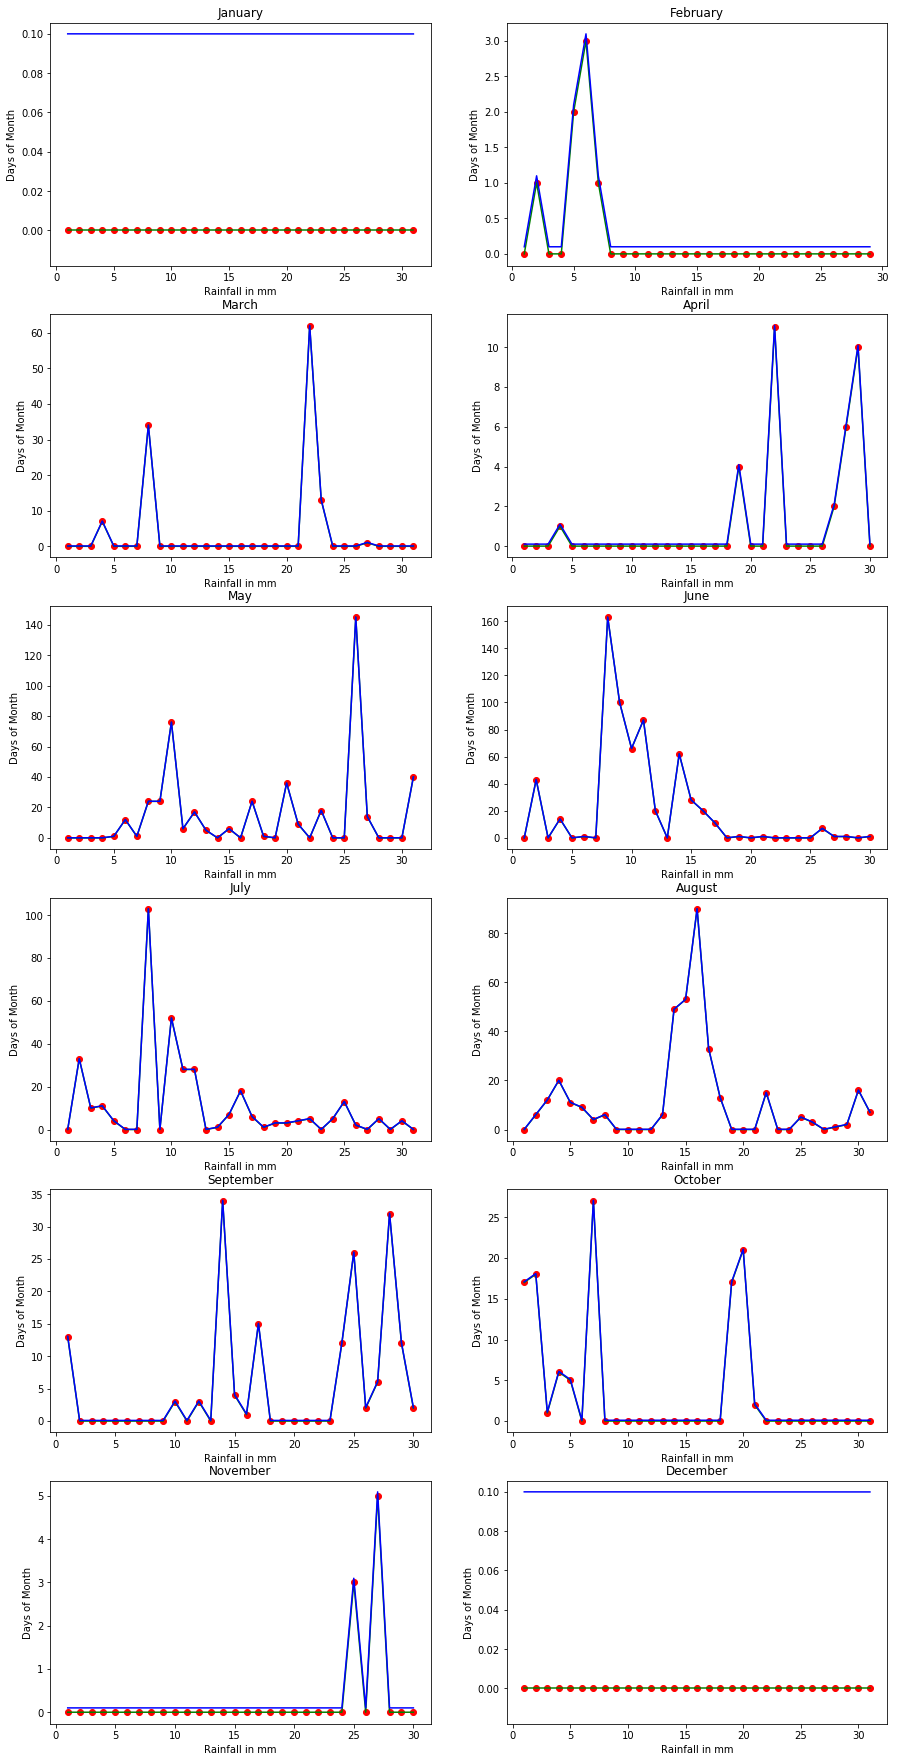

In [24]:
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],regressor.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=1)
neig.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
Y_pred = neig.predict(X_test)

In [27]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
1976-02-06,3,4
1976-03-04,7,10
1976-03-08,34,34
1976-03-22,62,59
1976-03-23,13,10
1976-04-19,4,3
1976-04-22,11,10
1976-04-27,2,1
1976-04-28,6,7
1976-04-29,10,10


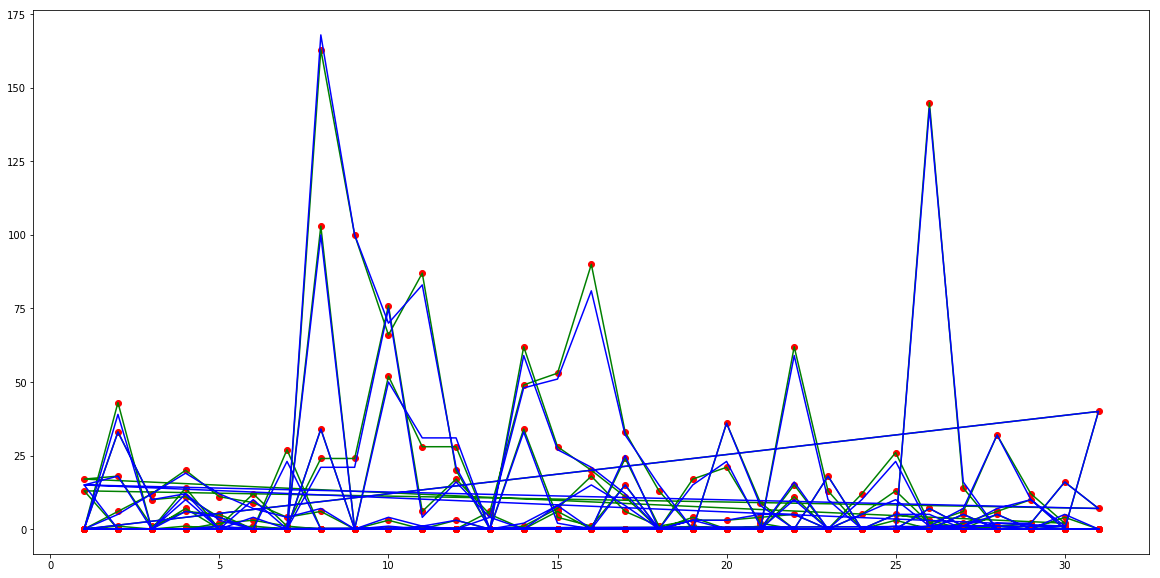

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

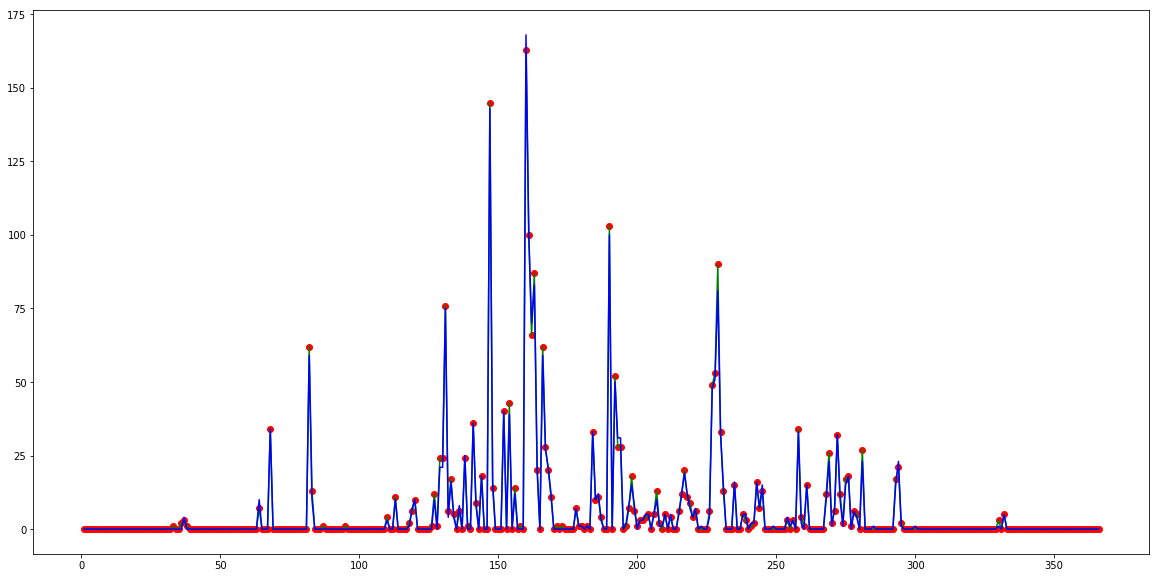

In [29]:
plt.figure(figsize=(20,10))
Y_test1=test['Rainfall']

plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

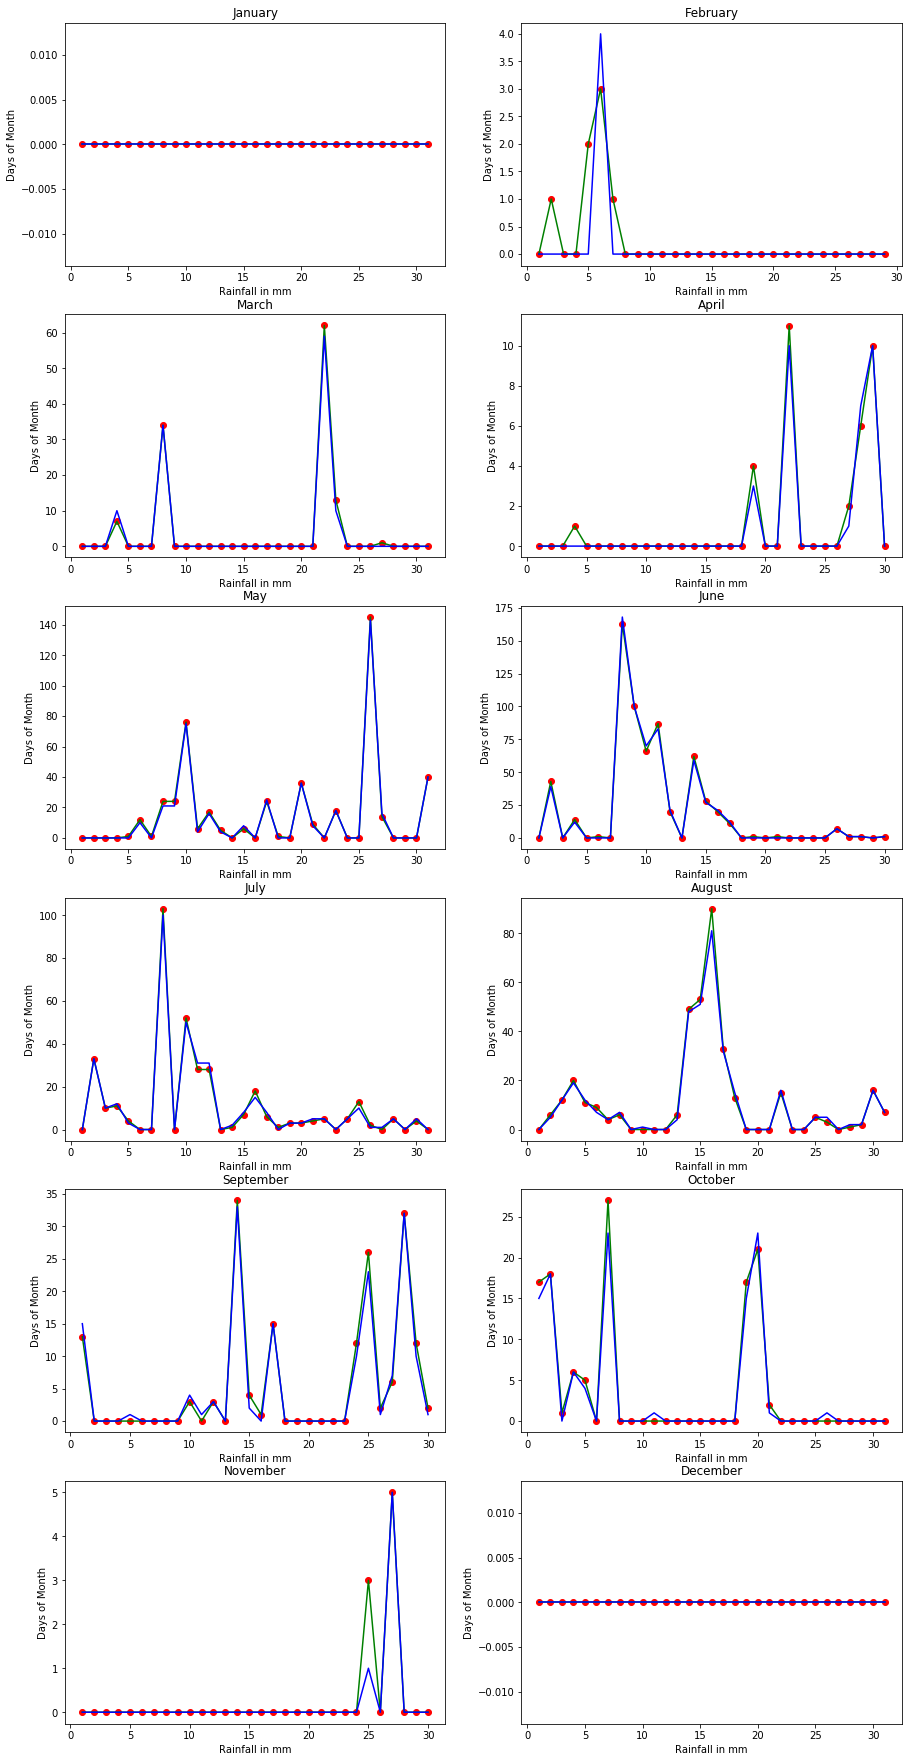

In [30]:
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],neig.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
Y_pred = mlp.predict(X_test)

In [33]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
1976-02-02,1,1
1976-02-05,2,2
1976-02-06,3,3
1976-02-07,1,1
1976-03-04,7,7
1976-03-08,34,18
1976-03-22,62,18
1976-03-23,13,11
1976-03-27,1,1
1976-04-04,1,1


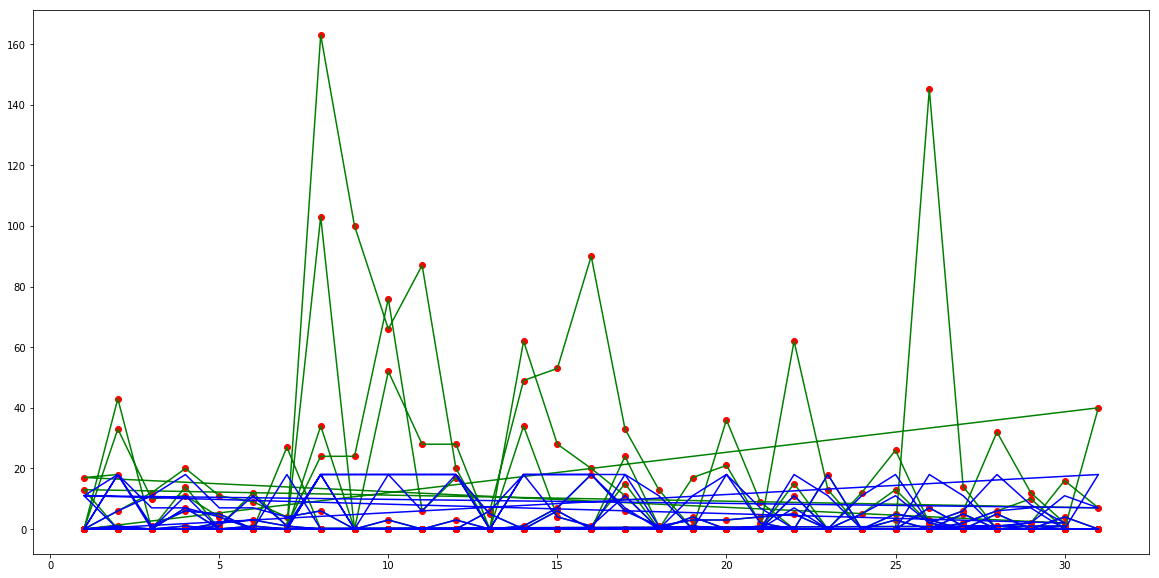

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test1,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

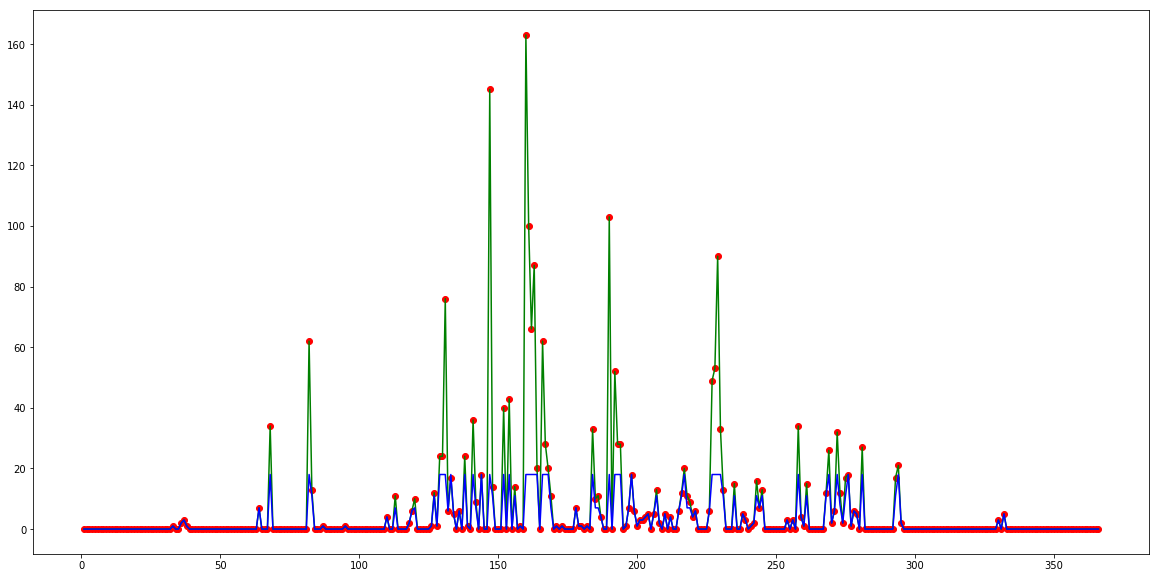

In [35]:
plt.figure(figsize=(20,10))
Y_test1=test['Rainfall']

plt.scatter(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test1,color='red')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_test,color='green')
plt.plot(test.drop(['Station','StationIndex'],axis=1)['dayofyear'],Y_pred,color='blue')

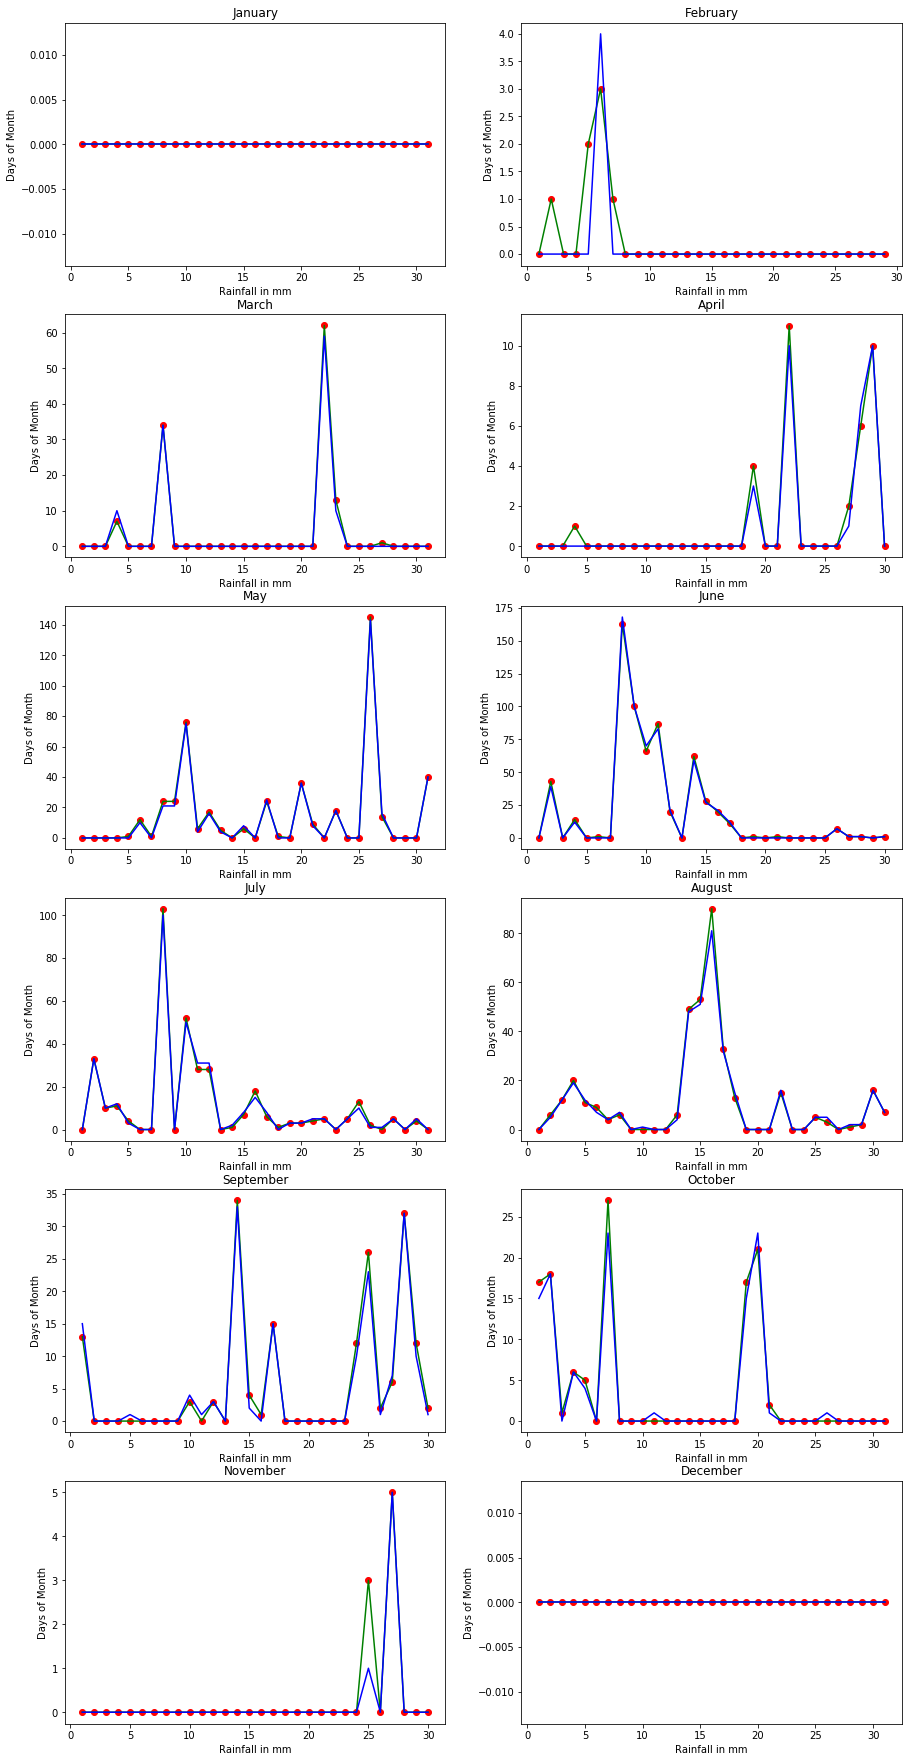

In [36]:
f, axs = plt.subplots(6,2,figsize=(15,15))
plt.subplots_adjust(top=1.7)
k=1
for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_xlabel('Rainfall in mm')
        axs[i,j].set_ylabel('Days of Month')
        axs[i,j].set_title(datetime.date(1900,k, 1).strftime('%B'))
        zx=test[test['Month']==k]['Rainfall']
        axs[i,j].scatter(X_test[X_test['Month']==k]['Day'],zx,color='red')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],zx,color='green')
        axs[i,j].plot(X_test[X_test['Month']==k]['Day'],neig.predict(X_test[X_test['Month']==k]),color='blue')
        k=k+1